This notebook should document the investigation in merging different parts and about deriving merge heuristics.

In [1]:
import probability_calculator as pc
from fractions import Fraction
import matplotlib.pyplot as plt
import numpy as np

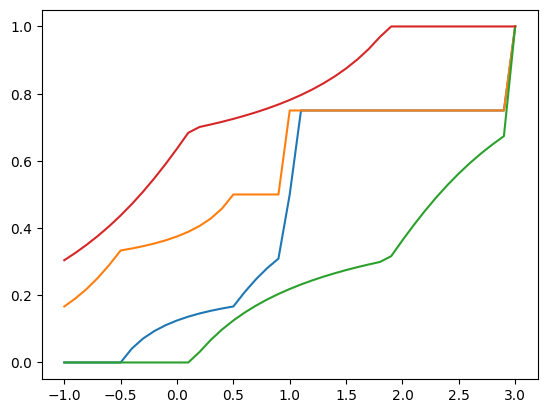

In [19]:
part1 = pc.part._Part(
    Fraction(1,2),
    Fraction(0),
    Fraction(1, 2),
    Fraction(-1),
    Fraction(1)
)

mean2 = Fraction(20, 10)
d2 = Fraction(1, 1)
part2 = pc.part._Part(
    Fraction(1,2),
    mean2,
    d2 + mean2**2,
    Fraction(-1, 1) + mean2,
    Fraction(1, 1) + mean2
)

parts = pc.part._Part.merge([part1, part2])

def plotData(part):
    ts = []
    l1 = []
    u1 = []

    t = Fraction(-1)
    delta = Fraction(1, 10)
    while t <= Fraction(3):
        (lower, upper) = part.partial_cdf(t)
    
        ts.append(float(t))
        l1.append(float(lower))
        u1.append(float(upper))

        t += delta

    return ts, l1, u1

ts1, l1, u1 = plotData(part1)
ts2, l2, u2 = plotData(part2)
tss, ls, us = plotData(parts)

plt.plot(ts1, np.array(l1) + np.array(l2))
plt.plot(ts1, np.array(u1) + np.array(u2))
plt.plot(tss, ls)
plt.plot(tss, us)